# RFP: Maze Solvers

## Project Overview
You are invited to submit a proposal that answers the following question:

### What path will your elf take?

*Please submit your proposal by **2/11/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, use [Gymnasium](https://gymnasium.farama.org/) to set up a [Frozen Lake maze](https://gymnasium.farama.org/environments/toy_text/frozen_lake/) for your project. When you are done with the set up, describe the reward system you plan on using.

*Note, a level 5 maze is at least 10 x 10 cells large and contains at least five lake cells.*

In [32]:
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
# Make maze
map_size=100
cells=map_size**2
env = gym.make('FrozenLake-v1', desc=generate_random_map(size=map_size), render_mode="rgb_array", is_slippery=False)
initial_state = env.reset()

env.render()

# Take a step (0: LEFT, 1: DOWN, 2: RIGHT, 3: UP)
#action = 2
#new_state, reward, terminated, truncated, info = env.step(action)

env.render()
env.close()

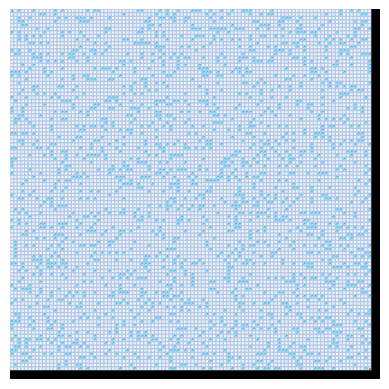

In [34]:
observation = env.render()
plt.imshow(observation)
plt.axis('off')
plt.show()

In [35]:
Qtable = []
actions = ['up', 'down', 'left', 'right']
for state in range(cells):
    action = [0] * len(actions)  
    Qtable.append(action)
Qtable=pd.DataFrame(Qtable)

In [36]:
Qtable

,0,1,2,3
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
9995,0,0,0,0
9996,0,0,0,0
9997,0,0,0,0
9998,0,0,0,0


In [41]:
holes = []
empty = []
goal = []
grid=env.unwrapped.desc
for row in range(map_size):
    for col in range(map_size):
        cell = grid[row][col].decode("utf-8")
        if cell == 'H': 
            holes.append((row, col))
        elif cell == 'F': 
            empty.append((row, col))
        elif cell =='G':
            goal.append((row,col))

In [42]:
holes

[(0, 2),
 (0, 6),
 (0, 12),
 (0, 14),
 (0, 21),
 (0, 23),
 (0, 24),
 (0, 35),
 (0, 36),
 (0, 41),
 (0, 43),
 (0, 46),
 (0, 50),
 (0, 51),
 (0, 52),
 (0, 55),
 (0, 58),
 (0, 61),
 (0, 64),
 (0, 65),
 (0, 66),
 (0, 72),
 (0, 91),
 (0, 94),
 (0, 96),
 (1, 8),
 (1, 9),
 (1, 12),
 (1, 31),
 (1, 40),
 (1, 43),
 (1, 45),
 (1, 54),
 (1, 56),
 (1, 60),
 (1, 66),
 (1, 69),
 (1, 71),
 (1, 72),
 (1, 87),
 (1, 91),
 (1, 97),
 (1, 98),
 (2, 2),
 (2, 5),
 (2, 13),
 (2, 15),
 (2, 18),
 (2, 19),
 (2, 20),
 (2, 22),
 (2, 27),
 (2, 38),
 (2, 41),
 (2, 42),
 (2, 44),
 (2, 45),
 (2, 48),
 (2, 49),
 (2, 55),
 (2, 58),
 (2, 75),
 (2, 76),
 (2, 77),
 (2, 80),
 (2, 84),
 (3, 2),
 (3, 3),
 (3, 12),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 37),
 (3, 38),
 (3, 45),
 (3, 48),
 (3, 56),
 (3, 67),
 (3, 68),
 (3, 74),
 (3, 75),
 (3, 79),
 (3, 88),
 (3, 95),
 (3, 97),
 (3, 98),
 (4, 3),
 (4, 4),
 (4, 38),
 (4, 39),
 (4, 41),
 (4, 50),
 (4, 61),
 (4, 69),
 (4, 70),
 (4, 71),
 (4, 74),
 (4, 80),
 (4, 86),
 (4, 97),
 (5, 7),
 

In [43]:
empty

[(0, 1),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 13),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 22),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 42),
 (0, 44),
 (0, 45),
 (0, 47),
 (0, 48),
 (0, 49),
 (0, 53),
 (0, 54),
 (0, 56),
 (0, 57),
 (0, 59),
 (0, 60),
 (0, 62),
 (0, 63),
 (0, 67),
 (0, 68),
 (0, 69),
 (0, 70),
 (0, 71),
 (0, 73),
 (0, 74),
 (0, 75),
 (0, 76),
 (0, 77),
 (0, 78),
 (0, 79),
 (0, 80),
 (0, 81),
 (0, 82),
 (0, 83),
 (0, 84),
 (0, 85),
 (0, 86),
 (0, 87),
 (0, 88),
 (0, 89),
 (0, 90),
 (0, 92),
 (0, 93),
 (0, 95),
 (0, 97),
 (0, 98),
 (0, 99),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 10),
 (1, 11),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 

In [44]:
goal

[(99, 99)]

#### Describe your reward system here.

### 2. Training Your Model
In the cell seen below, write the code you need to train a Q-Learning model. Display your final Q-table once you are done training your model.

*Note, level 5 work uses only the standard Python library and Pandas to train your Q-Learning model. A level 4 uses external libraries like Baseline3.*

In [4]:
# Train model here.
# Don't forget to display your final Q table!

### 3. Testing Your Model
In the cell seen below, write the code you need to test your Q-Learning model for **1000 episodes**. It is important to test your model for 1000 episodes so that we are all able to compare our results.

*Note, level 5 testing uses both a success rate and an average steps taken metric to evaluate your model. Level 4 uses one or the other.*

In [5]:
# Test model here.

### 4. Final Answer
In the first cell below, describe the path your elf takes to get to the gift. *Note, a level 5 answer includes a gif of the path your elf takes in order to reach the gift.*

In the second cell seen below, describe how well your Q-Learning model performed. Make sure that you explicitly name the **learning rate**, **the discount factor**, and the **reward system** that you used when training your final model. *Note, a level 5 description describes the model's performance using two types of quantitative evidence.*

![example image](https://gymnasium.farama.org/_images/frozen_lake.gif)

#### Describe the path your elf takes here.

#### Describe how well your Q-Learning model performed here.